In [2]:
!pip install pandas

In [8]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 14.4 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.3 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 16.0 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------- ----------------- 3.9/7.0 MB 19.5 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 17.9 MB/s  0:00:00
Using cached pyparsing-3.2.3-py3-none-

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
df = pd.read_csv("mypro.csv")

In [13]:
INPUT_CSV = 'mypro.csv'
OUTPUT_DIR = 'outputs'
URGENT_KEYWORDS = ['urgent', 'critical', 'immediate']

In [14]:
##Load support emails CSV into a DataFrame.

def load_data(csv_file):
    return pd.read_csv(csv_file)

In [15]:
## Convert text columns to lowercase for uniform analysis.

def preprocess_data(df):
    df['subject'] = df['subject'].str.lower()
    df['body'] = df['body'].str.lower()
    return df

In [16]:
## Flag emails containing urgent keywords in subject or body.

def detect_urgent(df, keywords):
    def is_urgent(text):
        return any(keyword in text for keyword in keywords)
    df['is_urgent'] = df['subject'].apply(is_urgent) | df['body'].apply(is_urgent)
    return df

In [17]:
## Create summary statistics.

def generate_summary(df):
    top_subjects = df['subject'].value_counts().head(5)
    top_bodies = df['body'].value_counts().head(5)
    top_senders = df['sender'].value_counts().head(5)
    urgent_count = df['is_urgent'].sum()

    return {
        'top_subjects': top_subjects,
        'top_issues': top_bodies,
        'top_senders': top_senders,
        'urgent_ticket_count': urgent_count
    }

In [18]:
## Save urgent tickets and processed complete dataset.

def save_outputs(df, urgent_tickets, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    urgent_tickets.to_csv(os.path.join(output_dir, 'urgent_tickets.csv'), index=False)
    df.to_csv(os.path.join(output_dir, 'processed_emails_report.csv'), index=False)

In [19]:
 ## Generate bar charts for top subjects, senders, and urgent subjects.

def plot_summary(df):
    # Top 5 subjects
    top_subjects = df['subject'].value_counts().head(5)
    # Top 5 senders
    top_senders = df['sender'].value_counts().head(5)
    # Top 5 urgent subjects
    urgent_subjects = df[df['is_urgent']]['subject'].value_counts().head(5)
    
    plt.figure(figsize=(12, 16))
    
    plt.subplot(3, 1, 1)
    sns.barplot(y=top_subjects.index, x=top_subjects.values, 
                hue=top_subjects.index, palette='viridis', legend=False)
    plt.title('Top 5 Support Email Subjects')
    plt.xlabel('Number of Emails')
    plt.ylabel('Subject')
    
    plt.subplot(3, 1, 2)
    sns.barplot(y=top_senders.index, x=top_senders.values, 
                hue=top_senders.index, palette='magma', legend=False)
    plt.title('Top 5 Email Senders')
    plt.xlabel('Number of Emails')
    plt.ylabel('Sender')
    
    plt.subplot(3, 1, 3)
    sns.barplot(y=urgent_subjects.index, x=urgent_subjects.values, 
                hue=urgent_subjects.index, palette='rocket', legend=False)
    plt.title('Top 5 Subjects with Urgent Tickets')
    plt.xlabel('Number of Urgent Emails')
    plt.ylabel('Subject')
    
    plt.tight_layout()
    plt.show()


In [20]:
def main():
    # Load and preprocess data
    df = load_data(INPUT_CSV)
    df = preprocess_data(df)
    df = detect_urgent(df, URGENT_KEYWORDS)

    # Generate and print summary
    summary = generate_summary(df)
    print("Summary Report:\n")
    print("- Top Subjects:\n", summary['top_subjects'], "\n")
    print("- Top Issues:\n", summary['top_issues'], "\n")
    print("- Top Senders:\n", summary['top_senders'], "\n")
    print(f"- Number of Urgent Tickets: {summary['urgent_ticket_count']}\n")

    # Save outputs
    urgent_tickets = df[df['is_urgent']]
    save_outputs(df, urgent_tickets, OUTPUT_DIR)

    # Plot summary charts
    plot_summary(df)

Summary Report:

- Top Subjects:
 subject
help required with account verification       5
general query about subscription              3
immediate support needed for billing error    2
urgent request: system access blocked         2
critical help needed for downtime             2
Name: count, dtype: int64 

- Top Issues:
 body
hi team, i am unable to log into my account since yesterday. could you please help me resolve this issue?    4
do you support integration with third-party apis? specifically, i’m looking for crm integration options.     3
despite multiple attempts, i cannot reset my password. the reset link doesn’t seem to work.                  3
our servers are down, and we need immediate support. this is highly critical.                                3
there is a billing error where i was charged twice. this needs immediate correction.                         2
Name: count, dtype: int64 

- Top Senders:
 sender
alice@example.com      8
eve@startup.io         5
diana@client.c

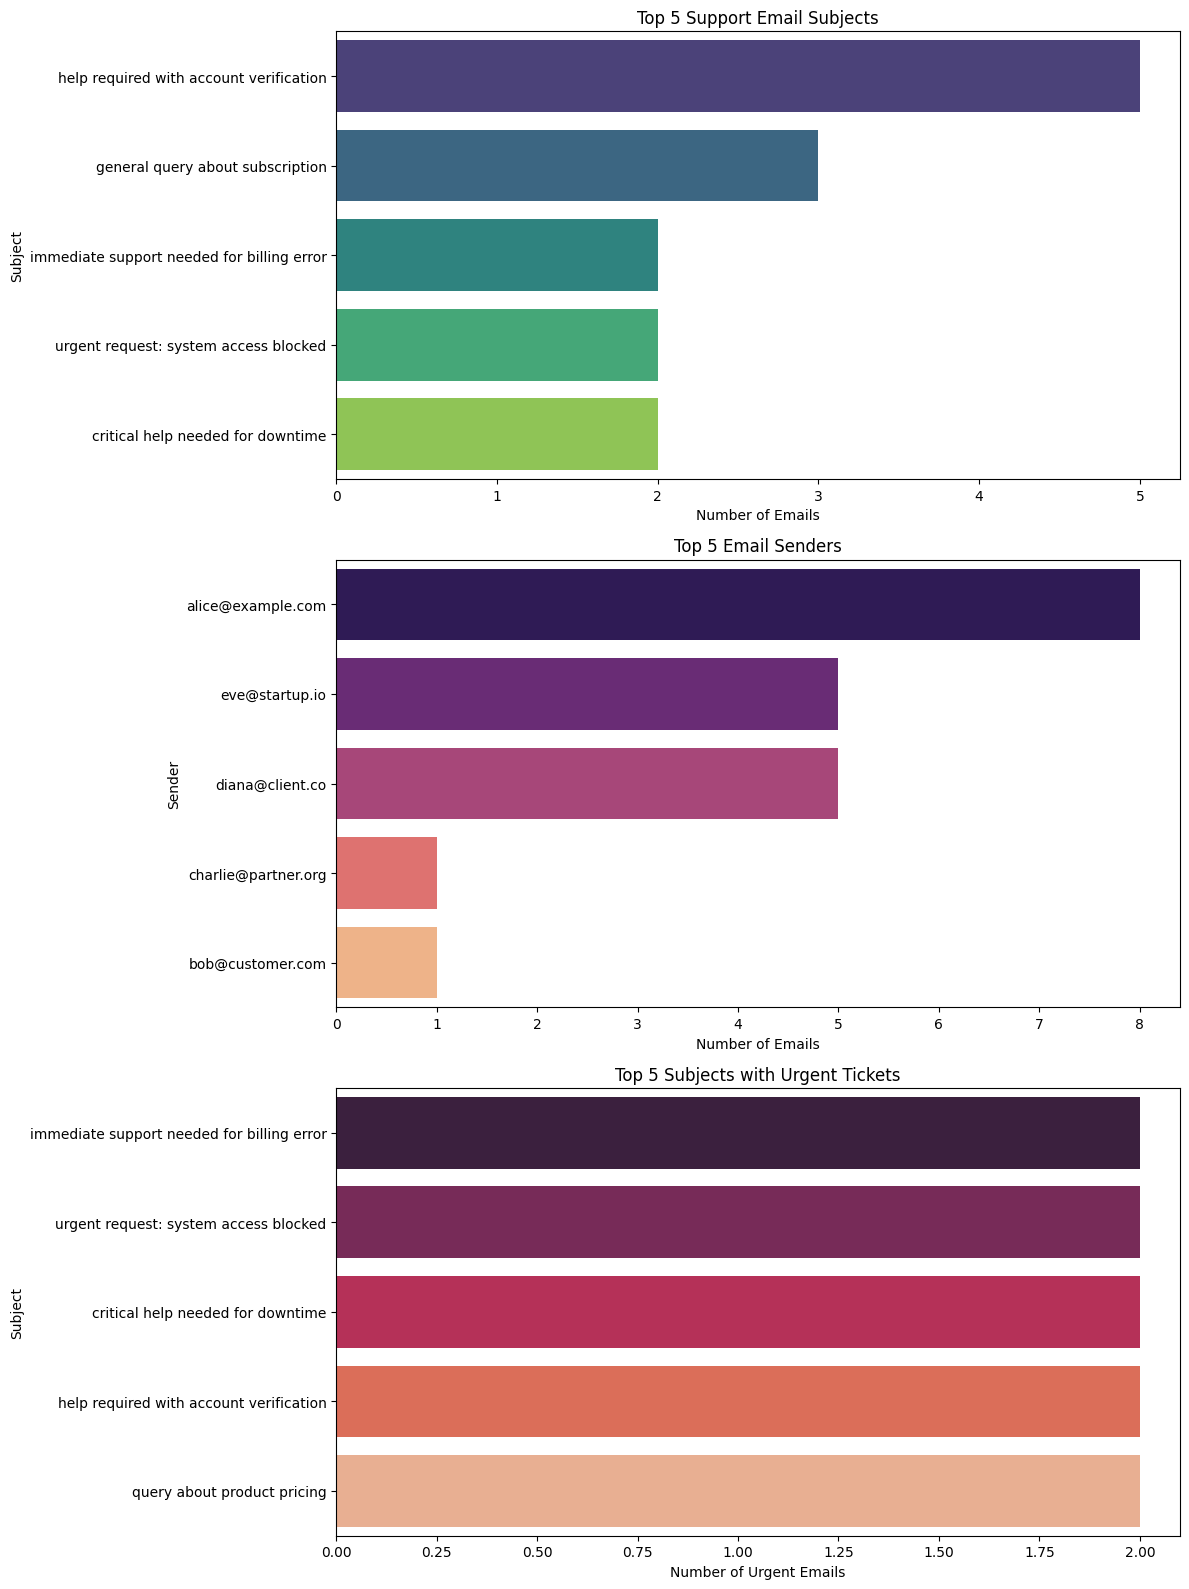

In [ ]:
if __name__ == "__main__":
    main()